1. Import PNG 

In [6]:
from PIL import Image

filename = "Correction_Tape_Original.png"

with Image.open(filename) as img:
    img.load()

# img.format ##  format = PNG
# img.size ## size = (1280, 960)
# img.mode ## mode = RGB
img.show()

2. Image Resizing (Croping)

In [8]:
cropped_img = img.crop((550, 50, 900, 1000)) 

# has 4 tuples defines left, upper, right, bottom
# Pillow assigns the coordinates (0,0) to the pixel at the upper-left corner

cropped_img.size 
(350, 950)
# the new image cropped has a size of 350 x 950 pixels

cropped_img.show()

3. Image Resizing (Resizing)

In [12]:
# cropped_img = img.crop((550, 50, 900, 1000)) 

low_res_img = img.resize(
    (img.width // 4, img.height // 4)
)
# Resize() = set new width and height to 1/4 of their original values using floor division operator (//)
# new width = 350/4 = 87.5
# new height = 950/4 = 237.5

low_res_img.show()

4. Colour-Space Conversion

In [19]:
from PIL import Image

filename = "Doll_Original.png"

with Image.open(filename) as img:
    img.load()

# img.format ##  format = PNG
# img.size ## size = (1280, 960)
# img.mode ## mode = RGB

img.show()

cmyk_img = img.convert("CMYK") # 'CMYK' = a subtractive colour model which use four ink plates (cyan, magenta, yellow, key)
# it is encoded using the mode for printed material 

gray_img = img.convert("L")  # Grayscale
# .convert () = can be used to convert the mode of image 

cmyk_img.show()
gray_img.show()

# RGB image = has 3 bands ('R', 'G', 'B')
# CMYK image = has 4 bonds ('C', 'M', 'Y', 'K')
# Grayscale image = has only 1 band ('L')

5. Extra: Colour-Space Conversion (split(), .merge())

In [88]:
from PIL import Image

filename = "Doll_Original.png"

with Image.open(filename) as img:
    img.load()

red, green, blue = img.split()
# split() = seperate an image into its respectively bands

zeroed_band = red.point(lambda _: 0)

# merge() = combine back the seperate bands into an Image object 
red_merge = Image.merge(
    "RGB", (red, zeroed_band, zeroed_band)
)

green_merge = Image.merge(
    "RGB", (zeroed_band, green, zeroed_band)
)

blue_merge = Image.merge(
    "RGB", (zeroed_band, zeroed_band, blue)
)

red_merge.show()
green_merge.show()
blue_merge.show()

# The red image contains a strong signal in the pixels, because these dolls colour pixels are mostly red. 
# The green and blue channels show these pixels as dark because they have small values. 

6. Noise Generation

In [21]:
from PIL import Image, ImageFilter

filename = "Highlighter_Original.png"

with Image.open(filename) as img:
    img.load()

img.show()
# img.format ##  format = PNG

img_noise = img.filter(ImageFilter.GaussianBlur(5))

img_noise.show()

In [7]:
import numpy as np
from PIL import Image

# Open an image
filename = "Highlighter_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Convert image to numpy array
img_array = np.array(img)

# Generate Gaussian noise
mean = 0
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, img_array.shape)

# Add the Gaussian noise to the image
noisy_img_array = img_array + gaussian_noise

# Clip the values to be in the valid range [0, 255]
noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)

# Convert the numpy array back to a PIL image
noisy_img = Image.fromarray(noisy_img_array)

# Show the original and noisy images
img.show(title="Original Image")
noisy_img.show(title="Noisy Image")

In [13]:
import numpy as np
from PIL import Image
import random

# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_img = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add salt noise (white pixels)
    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_img

# Open an image
filename = "Highlighter_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Convert image to numpy array
img_array = np.array(img)

# Define the probability of salt and pepper noise
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

# Add salt and pepper noise to the image
noisy_img_array = add_salt_and_pepper_noise(img_array, salt_prob, pepper_prob)

# Convert the numpy array back to a PIL image
noisy_img = Image.fromarray(noisy_img_array)

# Show the original and noisy images
img.show(title="Original Image")
noisy_img.show(title="Noisy Image with Salt and Pepper")

7. Erosion = Remove pixels from the boundary of input image (Shrinking)

In [20]:
from PIL import ImageFilter

filename = "Highlighter_Original.png"

with Image.open(filename) as img:
    img.load()
    
img.show()

for _ in range(3):
    img = img.filter(ImageFilter.MinFilter(3))

img.show()

8. Dilation = Add pixels to the boundary of the input image

In [24]:
from PIL import ImageFilter

filename = "Highlighter_Original.png"

with Image.open(filename) as img:
    img.load()

img.show()

for _ in range(3):
    img = img.filter(ImageFilter.MaxFilter(3))

img.show()

Extra: Test on Erosion and Dilation

In [4]:
from PIL import Image, ImageFilter

# Load the image
filename = "Access_Card_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Apply Dilation using MaxFilter
dilated_img = img.filter(ImageFilter.MaxFilter(3))  # 3x3 kernel

# Apply Erosion using MinFilter
eroded_img = img.filter(ImageFilter.MinFilter(3))  # 3x3 kernel

# Show the original, dilated, and eroded images
img.show(title="Original Image")
dilated_img.show(title="Dilated Image")
eroded_img.show(title="Eroded Image")

8. Mean Filters

In [56]:
from PIL import Image, ImageFilter

filename = "Access_Card_Original.png"

with Image.open(filename) as img:
    img.load()
    
img.show(title="Original Image")

# Apply Mean Filter (BoxBlur with radius)
mean_filtered_img = img.filter(ImageFilter.BoxBlur(5))
# blurred image is generated by the box blur filter with radius of 5

mean_filtered_img.show()

# Mean = filter with  a small radius performs a mean-like operation by averaging the pixels in the neighborhood

9. Gaussian Filters

In [27]:
from PIL import Image, ImageFilter

filename = "Access_Card_Original.png"

with Image.open(filename) as img:
    img.load()

# Apply Gaussian Filter
gaussian_filtered_img = img.filter(ImageFilter.GaussianBlur(radius=4))
# Gaussian kernel put more weight on the pixels at the center of the kernel rather than
# those at the edges. So, Gaussian has smoother blurring compared to box blur

gaussian_filtered_img.show()

# Gaussian = applies a Gaussian blur with the specified radius

10. Median Filters

In [45]:
from PIL import Image, ImageFilter

filename = "Access_Card_Original.png"

with Image.open(filename) as img:
    img.load()

# Apply Median Filter
median_filtered_img = img.filter(ImageFilter.MedianFilter(size=5))

median_filtered_img.show()

# Median = replaces each pixel with the median value from its neighborhood

11. Edge Detection Algorithm

In [49]:
from PIL import Image

filename = "Access_Card_Original.png"

with Image.open(filename) as img:
    img.load()

# Image must be converted to grayscale before apply edge detection filter
img_gray = img.convert("L")
# edges = img_gray.filter(ImageFilter.FIND_EDGES)
# edges.show()
img. show()

img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)
edges_thickened = edges_smooth.filter(ImageFilter.MaxFilter(3))
edges_thickened.show()

In [32]:
from PIL import Image, ImageFilter

filename = "Access_Card_Original.png"

# Load and convert the image to grayscale
with Image.open(filename) as img:
    img.load()
    img_gray = img.convert("L")

# Smooth the grayscale image
img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)

# Apply edge detection
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)

# Thicken the edges using dilation (MaxFilter)
edges_thickened = edges_smooth.filter(ImageFilter.MaxFilter(3))

# Sharpen the thickened edges to make them clearer
edges_sharpened = edges_thickened.filter(ImageFilter.SHARPEN)

# Show the original, edges, and thickened and sharpened edges images
img.show(title="Original Image")
# edges_smooth.show(title="Smooth Edges")
# edges_thickened.show(title="Thickened Edges")
edges_sharpened.show(title="Thickened and Sharpened Edges")

12. Histogram Equalization

In [18]:
from PIL import Image
import numpy as np

def histogram_equalization(image):
    # Convert image to numpy array
    img_array = np.array(image)

    # Flatten the array and calculate histogram
    histogram, bins = np.histogram(img_array.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalize

    # Use linear interpolation of the CDF to find new pixel values
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Map the original image pixels to the equalized values
    img_equalized = cdf[img_array]

    # Convert the numpy array back to a PIL image
    img_equalized = Image.fromarray(img_equalized)

    return img_equalized

# Load the image
filename = "Access_Card_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Apply histogram equalization
img_equalized = histogram_equalization(img)

# Show the original and equalized images
img.show(title="Original Image")
img_equalized.show(title="Histogram Equalized Image")

# The primary effect of histogram equalization is improved contrast. 
# It redistributes the intensity values of the pixels so that they span the entire range of possible values. 
# This makes the details in the dark and bright areas of the image more visible.

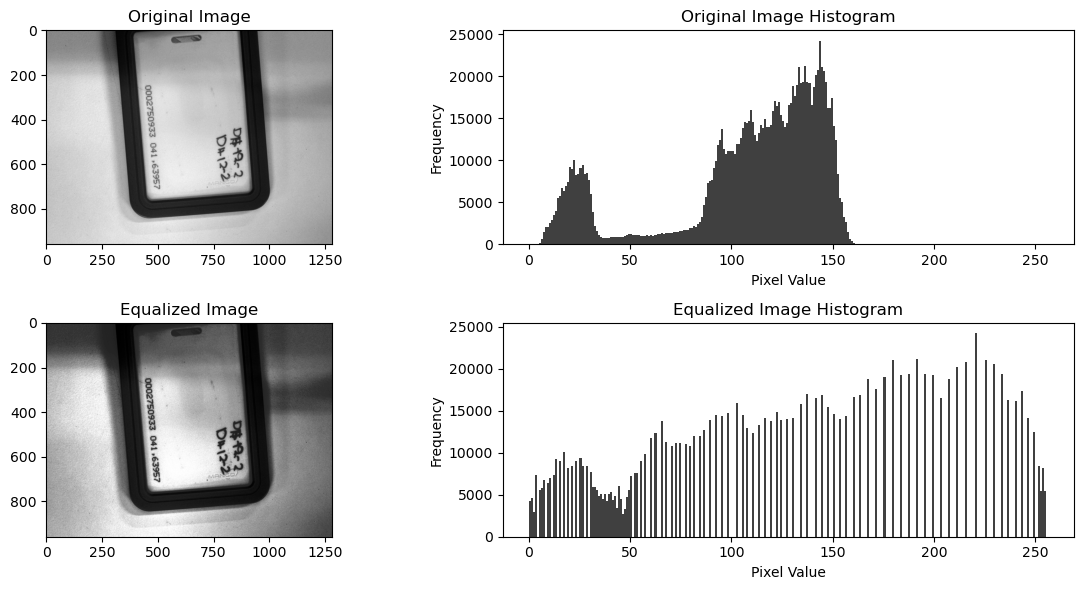

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert image to numpy array
    img_array = np.array(image)

    # Flatten the array and calculate histogram
    histogram, bins = np.histogram(img_array.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()  # Normalize

    # Use linear interpolation of the CDF to find new pixel values
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Map the original image pixels to the equalized values
    img_equalized = cdf[img_array]

    return img_equalized, img_array, cdf

# Load the image
filename = "Access_Card_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Apply histogram equalization
img_equalized_array, original_array, cdf = histogram_equalization(img)

# Convert the equalized array back to an image for display
img_equalized = Image.fromarray(img_equalized_array)

# Show the original and equalized images
img.show(title="Original Image")
img_equalized.show(title="Histogram Equalized Image")

# Plot the histograms
plt.figure(figsize=(12, 6))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(original_array, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.hist(original_array.flatten(), bins=256, range=(0, 256), color='black', alpha=0.75)
plt.title("Original Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(img_equalized_array, cmap='gray')
plt.title("Equalized Image")

plt.subplot(2, 2, 4)
plt.hist(img_equalized_array.flatten(), bins=256, range=(0, 256), color='black', alpha=0.75)
plt.title("Equalized Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

13. Hough Transform

In [62]:
from PIL import Image, ImageFilter

# Open an image
filename = "Highlighter_Original.png"


with Image.open(filename) as img:
    img.load()

img = Image.open(filename).convert('L')  # Convert to grayscale

img.show()
# img.format ##  format = PNG

ValueError: too many values to unpack (expected 2)

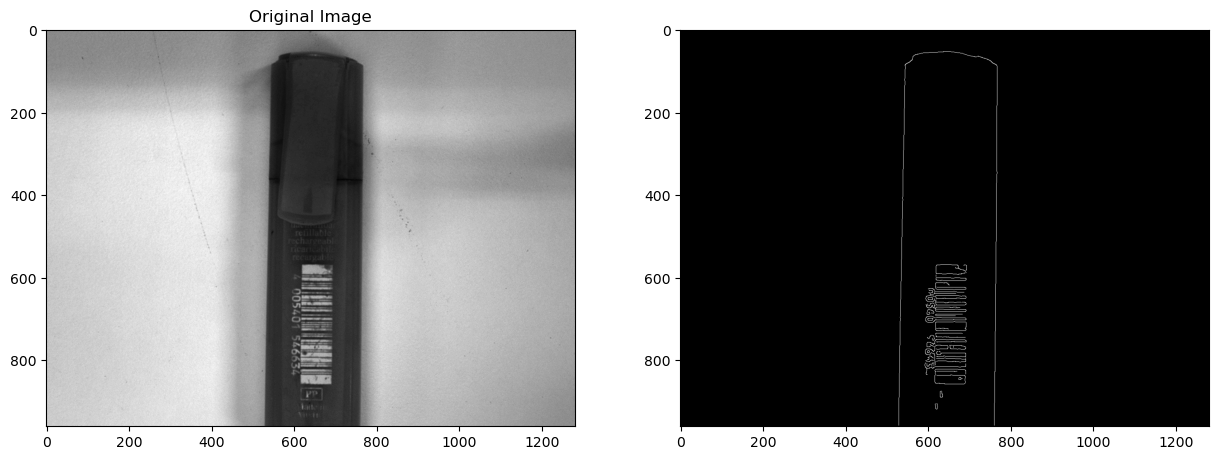

In [40]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, transform, color

# Load the image using Pillow
filename = "Highlighter_Original.png"
img = Image.open(filename).convert('L')  # Convert to grayscale

# Convert the image to a numpy array
img_array = np.array(img)

# Perform edge detection using Canny edge detector
edges = feature.canny(img_array, sigma=2)

# Perform Hough Transform to detect lines
hough_space, angles, distances = transform.hough_line(edges)

# Extract lines from the Hough Transform
hough_peaks = transform.hough_line_peaks(hough_space, angles, distances)

# Plot the original image and detected lines
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img_array, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(edges, cmap='gray')
for angle, dist in zip(*hough_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - edges.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, edges.shape[1]), (y0, y1), '-r')
ax[1].set_xlim((0, img_array.shape[1]))
ax[1].set_ylim((img_array.shape[0], 0))
ax[1].set_title('Detected Lines')

plt.tight_layout()
plt.show()

14. Morphological Operations

In [52]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion, binary_opening, binary_closing

# Open an image and convert to grayscale
filename = "Access_Card_Original.png"
img = Image.open(filename).convert('L')

# Convert image to numpy array
img_array = np.array(img)

# Convert grayscale image to binary (thresholding)
threshold = 85
binary_img = img_array > threshold

# Define a structuring element (kernel)
structuring_element = np.ones((2, 2), dtype=bool)

# Perform morphological operations
opened_img = binary_opening(binary_img, structure=structuring_element)
closed_img = binary_closing(binary_img, structure=structuring_element)

# Convert numpy arrays back to PIL images
opened_img_pil = Image.fromarray((opened_img * 255).astype(np.uint8))
closed_img_pil = Image.fromarray((closed_img * 255).astype(np.uint8))

# Display the images
img.show(title="Original Image")
opened_img_pil.show(title="Opened Image")
closed_img_pil.show(title="Closed Image")

15. Extra: To add mean/ Gaussian/ median filter to a Noisy image

In [17]:
# Gaussian Noise
import numpy as np
from PIL import Image, Image

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std_dev=25):
    # Convert the image to a NumPy array
    img_array = np.array(image)
    
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, std_dev, img_array.shape)
    
    # Add the Gaussian noise to the image
    noisy_img_array = img_array + gaussian_noise
    
    # Clip the values to be in the valid range [0, 255]
    noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)
    
    # Convert the NumPy array back to a PIL image
    noisy_img = Image.fromarray(noisy_img_array)
    
    return noisy_img

# Load the image
filename = "Access_Card_Original.png"
img = Image.open(filename) 

# Add Gaussian noise
noisy_img = add_gaussian_noise(img)

# Apply Mean Filter using BoxBlur
mean_filtered_img = noisy_img.filter(ImageFilter.BoxBlur(1))  # BoxBlur with radius 1 approximates a mean filter

# Apply Gaussian Filter
gaussian_filtered_img = noisy_img.filter(ImageFilter.GaussianBlur(1))  # GaussianBlur with radius 1

# Apply Median Filter
median_filtered_img = noisy_img.filter(ImageFilter.MedianFilter(size=3))  # MedianFilter with size 3

# Show the images
noisy_img.show(title="Noisy Image with Gaussian Noise")
mean_filtered_img.show(title="Mean Filtered Image")
gaussian_filtered_img.show(title="Gaussian Filtered Image")
median_filtered_img.show(title="Median Filtered Image")

In [24]:
# Salt and Pepper Noise
import numpy as np
from PIL import Image, ImageFilter
import random

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    # Convert the image to a NumPy array
    img_array = np.array(image)
    noisy_img_array = img_array.copy()

    # Add salt noise
    num_salt = np.ceil(salt_prob * img_array.size)
    coords = [np.random.randint(0, i, int(num_salt)) for i in img_array.shape]
    noisy_img_array[tuple(coords)] = 255

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * img_array.size)
    coords = [np.random.randint(0, i, int(num_pepper)) for i in img_array.shape]
    noisy_img_array[tuple(coords)] = 0

    # Convert the NumPy array back to a PIL image
    noisy_img = Image.fromarray(noisy_img_array)

    return noisy_img

# Load the image
filename = "Access_Card_Original.png"
img = Image.open(filename)  

# Add Salt and Pepper noise
noisy_img = add_salt_and_pepper_noise(img)

# Apply Mean Filter using BoxBlur
mean_filtered_img = noisy_img.filter(ImageFilter.BoxBlur(2))  # BoxBlur with radius 1 approximates a mean filter

# Apply Gaussian Filter
gaussian_filtered_img = noisy_img.filter(ImageFilter.GaussianBlur(2))  # GaussianBlur with radius 1

# Apply Median Filter
median_filtered_img = noisy_img.filter(ImageFilter.MedianFilter(size=3))  # MedianFilter with size 3

# Show the images
noisy_img.show(title="Noisy Image with Salt and Pepper Noise")
mean_filtered_img.show(title="Mean Filtered Image")
gaussian_filtered_img.show(title="Gaussian Filtered Image")
median_filtered_img.show(title="Median Filtered Image")